# Getting the Data

In [1]:
from pycaret.datasets import get_data
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#check the shape of data
dataset.shape

(150, 5)

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


# Setting up the Environment in PyCaret

In [4]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'species', session_id=123) 

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparing All Models

In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9678,0.9963,0.9667,0.9758,0.9669,0.9515,0.9560,0.0090
nb,Naive Bayes,0.9578,0.9897,0.9556,0.9713,0.9546,0.9364,0.9442,0.0100
qda,Quadratic Discriminant Analysis,0.9567,1.0000,0.9556,0.9708,0.9533,0.9348,0.9433,0.0150
lr,Logistic Regression,0.9478,0.9963,0.9444,0.9638,0.9444,0.9212,0.9304,0.8110
knn,K Neighbors Classifier,0.9467,0.9926,0.9444,0.9630,0.9432,0.9197,0.9291,0.0900
lightgbm,Light Gradient Boosting Machine,0.9456,0.9852,0.9444,0.9625,0.9419,0.9182,0.9282,0.0300
ada,Ada Boost Classifier,0.9256,0.9809,0.9222,0.9505,0.9194,0.8879,0.9026,0.0500
gbc,Gradient Boosting Classifier,0.9256,0.9815,0.9222,0.9505,0.9194,0.8879,0.9026,0.1150
et,Extra Trees Classifier,0.9256,0.9926,0.9222,0.9505,0.9194,0.8879,0.9026,0.3350
dt,Decision Tree Classifier,0.9144,0.9369,0.9111,0.9366,0.9086,0.8712,0.8843,0.0100


# Create a Model

### Decision Tree Classifier

In [6]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.9286,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,0.8571,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.7778,0.8333,0.7778,0.7778,0.7778,0.6667,0.6667
5,0.7778,0.8333,0.7778,0.8667,0.7500,0.6667,0.7223
6,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [7]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### K Neighbors Classifier

In [8]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
6,0.8889,0.9815,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Logistic Regression

In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,0.9630,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Tune a Model

### Decision Tree Classifier

In [10]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,0.9143,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,0.9444,0.8889,0.9167,0.8857,0.8333,0.8492
5,0.7778,0.8611,0.7778,0.7778,0.7778,0.6667,0.6667
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### K Neighbors Classifier

In [12]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
3,0.9000,0.9714,0.8889,0.9250,0.8971,0.8485,0.8616
4,0.8889,0.9259,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Logistic Regression

In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
3,0.8000,1.0000,0.7778,0.8800,0.7750,0.6970,0.7435
4,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Plot a Model

### Confusion Matrix

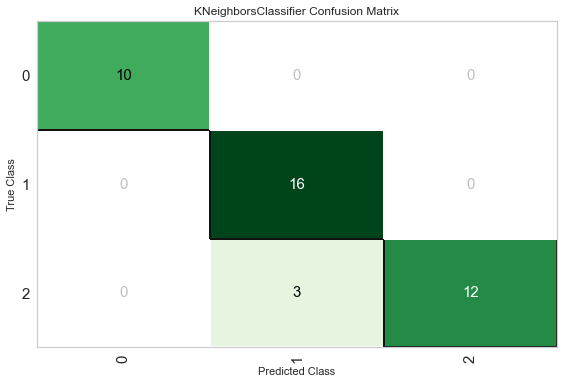

In [14]:
plot_model(tuned_knn, plot = 'confusion_matrix')

### Classification Report

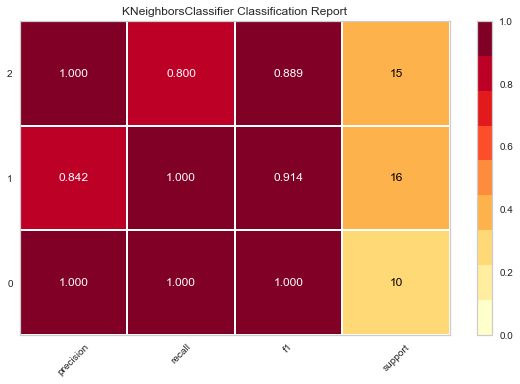

In [15]:
plot_model(tuned_knn, plot = 'class_report')

### Decision Boundary Plot

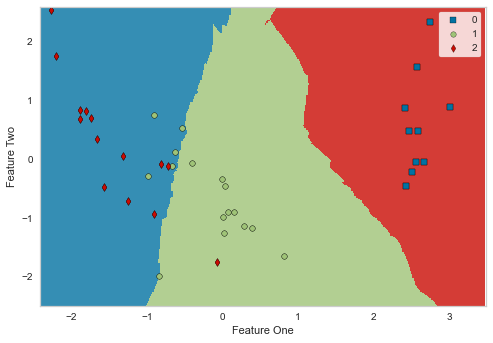

In [16]:
plot_model(tuned_knn, plot='boundary')

### Prediction Error Plot

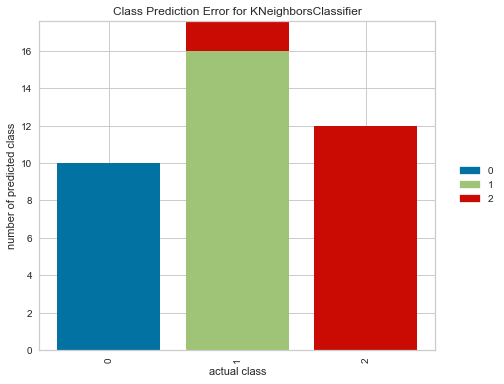

In [17]:
plot_model(tuned_knn, plot = 'error')

In [18]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on test / hold-out Sample

In [19]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9268,0.9761,0.9333,0.9384,0.9259,0.8879,0.8953


# Finalize Model for Deployment

In [20]:
final_knn = finalize_model(tuned_knn)

In [21]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')


# Predict on unseen data

In [22]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0000
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5455


# Saving the model

In [23]:
save_model(final_knn,'Final KNN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

# Loading the saved model

In [24]:
saved_final_knn = load_model('Final KNN Model')

Transformation Pipeline and Model Successfully Loaded


In [25]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [26]:
new_prediction.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,1.0000
1,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0000
2,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,1.0000
3,4.8,3.1,1.6,0.2,Iris-setosa,Iris-setosa,1.0000
4,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5455
